# Stats NZ Covid-19 portal analysis and visaualisation
Covid-19 portal provides significant information about the impact of Covid-19 on various sectors such as economic, health and social in New Zealand.

This notebook describes analysis and visualisation of wellbeing of New Zealanders during Covid-19 pandemic period. The data has been taken from Covid-19 portal. 




In [3]:
# Importing main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
Data is downloaded from Covid-19 portal https://www.stats.govt.nz/experimental/covid-19-data-portal

In [4]:
# Loading data from the portal
data = pd.read_csv('covid_19_data_portal.csv')


In [4]:
# To see frist five rows of the data
data.head()

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
0,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-05,997.14,$,11-02-21
1,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-12,1000.00,$,11-02-21
2,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-19,1000.00,$,11-02-21
3,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-26,1000.00,$,11-02-21
4,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-06-02,995.19,$,11-02-21


In [4]:
# To see column names
data.columns

Index(['class', 'category', 'indicator_name', 'series_name', 'sub_series_name',
       'parameter', 'value', 'units', 'date_last_updated'],
      dtype='object')

In [62]:
#To see info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164384 entries, 0 to 164383
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   class              164384 non-null  object 
 1   category           164384 non-null  object 
 2   indicator_name     164384 non-null  object 
 3   series_name        164384 non-null  object 
 4   sub_series_name    164384 non-null  object 
 5   parameter          164384 non-null  object 
 6   value              157543 non-null  float64
 7   units              164384 non-null  object 
 8   date_last_updated  164384 non-null  object 
dtypes: float64(1), object(8)
memory usage: 11.3+ MB


In [4]:
# To check are there null values in the dataset
data.isna().sum()

class                   0
category                0
indicator_name          0
series_name             0
sub_series_name         0
parameter               0
value                6841
units                   0
date_last_updated       0
dtype: int64

Value column has 6841 null values

In [112]:
# To see desriptive stats of the columns who hold numerical values
data.describe()

,value
count,1.575430e+05
mean,1.922985e+09
std,6.213187e+09
min,-7.974530e+01
25%,2.760000e+02
50%,1.361700e+04
75%,8.340000e+08
max,6.436600e+10


# Covid cases per country

To see the number of covid-19 cases for each country, we need to filter the category column and select the rows of Covid-19. 



In [6]:
# Sub setting main dataset to have just Covid-19 rows in the category column
data_covid = data[data['category'] == 'COVID-19'] 
data_covid

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
29023,Health,COVID-19,Quarantine and managed isolation figures,Occupancy,Quarantine and managed isolation figures as at...,Auckland,2718.0,Number,12-02-21
29024,Health,COVID-19,Quarantine and managed isolation figures,Occupancy,Quarantine and managed isolation figures as at...,Christchurch,891.0,Number,12-02-21
29025,Health,COVID-19,Quarantine and managed isolation figures,Occupancy,Quarantine and managed isolation figures as at...,Hamilton,221.0,Number,12-02-21
29026,Health,COVID-19,Quarantine and managed isolation figures,Occupancy,Quarantine and managed isolation figures as at...,Rotorua,359.0,Number,12-02-21
29027,Health,COVID-19,Quarantine and managed isolation figures,Occupancy,Quarantine and managed isolation figures as at...,Total,4287.0,Number,12-02-21
...,...,...,...,...,...,...,...,...,...
154948,Health,COVID-19,Source of cases,Source,Imported,Whanganui,7.0,Number,12-02-21
154949,Health,COVID-19,Source of cases,Source,Import-related,Whanganui,0.0,Number,12-02-21
154950,Health,COVID-19,Source of cases,Source,"Locally acquired, linked",Whanganui,0.0,Number,12-02-21
154951,Health,COVID-19,Source of cases,Source,"Locally acquired, unknown source",Whanganui,2.0,Number,12-02-21


In [6]:
# To check are there nan values
data_covid.isna().sum()


class                0
category             0
indicator_name       0
series_name          0
sub_series_name      0
parameter            0
value                1
units                0
date_last_updated    0
dtype: int64

value column has one nan, we can drop that row.

In [7]:
# Drop the row with nan value
data_covid.dropna(inplace=True)

<ipython-input-7-8cf080491ff1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_covid.dropna(inplace=True)


In [8]:
# To cross check is there still nan value left
data_covid.isna().sum()

class                0
category             0
indicator_name       0
series_name          0
sub_series_name      0
parameter            0
value                0
units                0
date_last_updated    0
dtype: int64

In [99]:
# To see different types of indicator_name
data_covid['indicator_name'].unique()

array(['Quarantine and managed isolation figures', 'Tests per day',
       'Number of cases (other countries)', 'Number of cases',
       'Case demographics', 'Status of cases', 'Source of cases'],
      dtype=object)

There are various indicators in the indicator_name column but we are interested in computing the number of Covid-19 cases for each country, so we have to filter indicator_name column to have the rows of number of cases. 

In [9]:
# To have the rows that contain number in the indictor_name column 
data_covid_no = data_covid[data_covid['indicator_name'].str.contains('Number')]
data_covid_no

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
112127,Health,COVID-19,Number of cases (other countries),Australia,Deceased,2020-01-22,0.0,Number,12-02-21
112128,Health,COVID-19,Number of cases (other countries),Australia,Deceased,2020-01-23,0.0,Number,12-02-21
112129,Health,COVID-19,Number of cases (other countries),Australia,Deceased,2020-01-24,0.0,Number,12-02-21
112130,Health,COVID-19,Number of cases (other countries),Australia,Deceased,2020-01-25,0.0,Number,12-02-21
112131,Health,COVID-19,Number of cases (other countries),Australia,Deceased,2020-01-26,0.0,Number,12-02-21
...,...,...,...,...,...,...,...,...,...
132774,Health,COVID-19,Number of cases,New Zealand,Recovered,2021-02-08,2229.0,Number,12-02-21
132775,Health,COVID-19,Number of cases,New Zealand,Recovered,2021-02-09,2230.0,Number,12-02-21
132776,Health,COVID-19,Number of cases,New Zealand,Recovered,2021-02-10,2240.0,Number,12-02-21
132777,Health,COVID-19,Number of cases,New Zealand,Recovered,2021-02-11,2245.0,Number,12-02-21


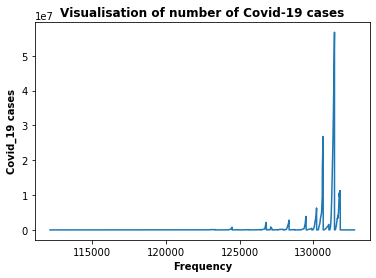

In [14]:
# To visualise the number Covid-19 of cases data

data_covid_no.value.plot()

# Adding some communication
#plt.text(weight='bold')
plt.ylabel('Covid_19 cases', weight='bold')
plt.xlabel('Frequency', weight='bold')
plt.title('Visualisation of number of Covid-19 cases', weight='bold');

The number of active, deceased and recovered cases are updated daily on the portal. We have to group the series_name column (which has the differnt country names) and the sub_series_name column ( which holds the status of Covid-19 case) with maximum of the value column.

In [23]:
# Grouping to see number of active, deceased and recovered cases for each country
country_cases = data_covid_no.groupby(['series_name', 'sub_series_name']).agg({'value' : 'max'})
country_cases

value
series_name                    sub_series_name            
Australia                      Active               9380.0
                               Deceased              909.0
                               Recovered           26108.0
Australia - ACT                Active                 76.0
                               Deceased                3.0
                               Recovered             115.0
Australia - New South Wales    Active               2868.0
                               Deceased               54.0
                               Recovered            3262.0
Australia - Northern Territory Active                 26.0
                               Deceased                0.0
                               Recovered              98.0
Australia - Queensland         Active                895.0
                               Deceased                7.0
                               Recovered            1299.0
Australia - South Australia    Active                361.0
                               Deceased                4.0
                               Recovered             597.0
Australia - Tasmania           Active                122.0
                               Deceased               13.0
                               Recovered             221.0
Australia - Victoria           Active               8490.0
                               Deceased              820.0
                               Recovered           19623.0
Australia - Western Australia  Active                358.0
                               Deceased                9.0
                               Recovered             893.0
Canada                         Active              82483.0
                               Deceased            21007.0
                               Recovered          760476.0
China                          Active              58108.0
                               Deceased             4825.0
                               Recovered           94288.0
Italy                          Active             805947.0
                               Deceased            92338.0
                               Recovered         2165817.0
New Zealand                    Active                929.0
                               Deceased               25.0
                               Recovered            2257.0
Rest of world                  Active           11231332.0
                               Deceased          1585114.0
                               Recovered        56758222.0
Singapore                      Active              20799.0
                               Deceased               29.0
                               Recovered           59526.0
Spain                          Active            2809521.0
                               Deceased            63704.0
                               Recovered          150376.0
United Kingdom                 Active            3871270.0
                               Deceased           115068.0
                               Recovered           10495.0
United States                  Active           26815592.0
                               Deceased           471567.0
                               Recovered         6298082.0

In [24]:
# Dropping rows of Australian regions as we are interested in only countries but the regions of a country
country_cases = country_cases.drop(country_cases.index[3:27])
country_cases


value
series_name    sub_series_name            
Australia      Active               9380.0
               Deceased              909.0
               Recovered           26108.0
Canada         Active              82483.0
               Deceased            21007.0
               Recovered          760476.0
China          Active              58108.0
               Deceased             4825.0
               Recovered           94288.0
Italy          Active             805947.0
               Deceased            92338.0
               Recovered         2165817.0
New Zealand    Active                929.0
               Deceased               25.0
               Recovered            2257.0
Rest of world  Active           11231332.0
               Deceased          1585114.0
               Recovered        56758222.0
Singapore      Active              20799.0
               Deceased               29.0
               Recovered           59526.0
Spain          Active            2809521.0
               Deceased            63704.0
               Recovered          150376.0
United Kingdom Active            3871270.0
               Deceased           115068.0
               Recovered           10495.0
United States  Active           26815592.0
               Deceased           471567.0
               Recovered         6298082.0

In [25]:
# To convert into dataframe 
country_cases_unstack =  country_cases.unstack()
country_cases_unstack

value                       
sub_series_name      Active   Deceased   Recovered
series_name                                       
Australia            9380.0      909.0     26108.0
Canada              82483.0    21007.0    760476.0
China               58108.0     4825.0     94288.0
Italy              805947.0    92338.0   2165817.0
New Zealand           929.0       25.0      2257.0
Rest of world    11231332.0  1585114.0  56758222.0
Singapore           20799.0       29.0     59526.0
Spain             2809521.0    63704.0    150376.0
United Kingdom    3871270.0   115068.0     10495.0
United States    26815592.0   471567.0   6298082.0

In [27]:
# Dropping rest of world row for good visualusation
country_wise_cases =country_cases_unstack.drop('Rest of world')
country_wise_cases

value                     
sub_series_name      Active  Deceased  Recovered
series_name                                     
Australia            9380.0     909.0    26108.0
Canada              82483.0   21007.0   760476.0
China               58108.0    4825.0    94288.0
Italy              805947.0   92338.0  2165817.0
New Zealand           929.0      25.0     2257.0
Singapore           20799.0      29.0    59526.0
Spain             2809521.0   63704.0   150376.0
United Kingdom    3871270.0  115068.0    10495.0
United States    26815592.0  471567.0  6298082.0

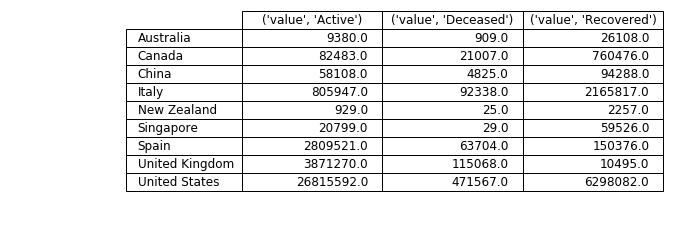

In [202]:
# To convert dataframe into table 

from pandas.plotting import table 

fig, ax = plt.subplots(figsize=(12, 4)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, country_wise_cases, loc='upper right', colWidths=[0.14]*len(country_wise_cases.columns))  # where data_covid_no is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.5, 1.5) # change size table
plt.savefig('Rain_table.png', transparent=True)

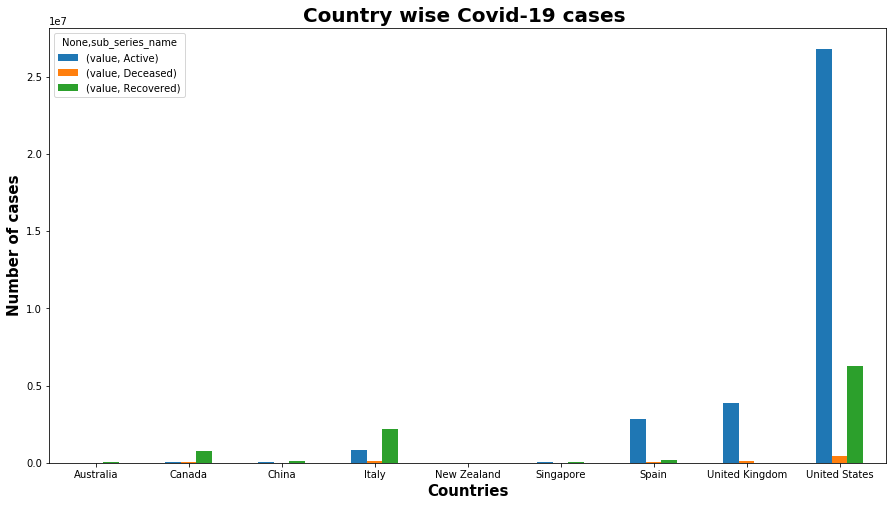

In [28]:
# Plot to see the number of Covid-19 cases for each country

country_wise_cases.plot(kind='bar', figsize=(15, 8))

# Adding communication
plt.title('Country wise Covid-19 cases ', size=20 , weight='bold')
plt.xlabel('Countries', size=15, weight='bold')
plt.ylabel('Number of cases', size=15, weight='bold')
plt.xticks(rotation=0);

# Mental health 
Many people around the globe is mentally affected by Covid-19. Let us see the mental health status of New Zealanders. 
First, we need to filter the data to have the rows of mental health in the category column.

In [29]:
# Filtering to have the rows of mental health in the categroy column
men_data = data[data['category'] == 'Mental health']
men_data

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
352,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents,05-04-20,66.9,%,02-10-20
353,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents_lower,05-04-20,63.6,%,02-10-20
354,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents_upper,05-04-20,70.1,%,02-10-20
355,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents,12-04-20,59.4,%,02-10-20
356,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents_lower,12-04-20,56.0,%,02-10-20
...,...,...,...,...,...,...,...,...,...
791,Health,Mental health,Depression / anxiety,undefined_name,Percentage of respondents_lower,30-08-20,6.9,%,02-10-20
792,Health,Mental health,Depression / anxiety,undefined_name,Percentage of respondents_upper,30-08-20,10.5,%,02-10-20
793,Health,Mental health,Depression / anxiety,undefined_name,Percentage of respondents,06-09-20,9.0,%,02-10-20
794,Health,Mental health,Depression / anxiety,undefined_name,Percentage of respondents_lower,06-09-20,6.6,%,02-10-20


In [108]:
# To check are there nan values
men_data.isna().sum()

class                0
category             0
indicator_name       0
series_name          0
sub_series_name      0
parameter            0
value                0
units                0
date_last_updated    0
dtype: int64

men_data does not have any nan value

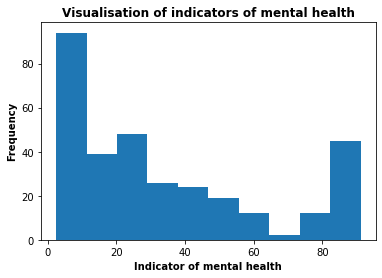

In [25]:
# Plot to see distribution of status of mental health
men_data.value.plot.hist()

# Adding communication
plt.title('Visualisation of indicators of mental health', fontweight='bold')
plt.xlabel('Indicator of mental health', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold');

To see the average percentage of each mental status, we have to group inidcator column and the mean of the value column

In [30]:
# grouping to find average percenatage of each indicator name 
men_group = men_data.groupby('indicator_name').value.mean()
men_group

indicator_name
Calmness                     84.629825
Depression / anxiety          9.083333
Nervousness                  25.983333
Stress about leaving home    11.078788
Worry about family health    47.595455
Name: value, dtype: float64

In [31]:
# To convert into the dataframe
men_group_data = men_group.reset_index()
men_group_data

,indicator_name,value
0,Calmness,84.629825
1,Depression / anxiety,9.083333
2,Nervousness,25.983333
3,Stress about leaving home,11.078788
4,Worry about family health,47.595455


In [32]:
# Adding new column with rounded values 
men_group_data['percentage'] = men_group_data['value'].round() 
men_group_data

,indicator_name,value,percentage
0,Calmness,84.629825,85.0
1,Depression / anxiety,9.083333,9.0
2,Nervousness,25.983333,26.0
3,Stress about leaving home,11.078788,11.0
4,Worry about family health,47.595455,48.0


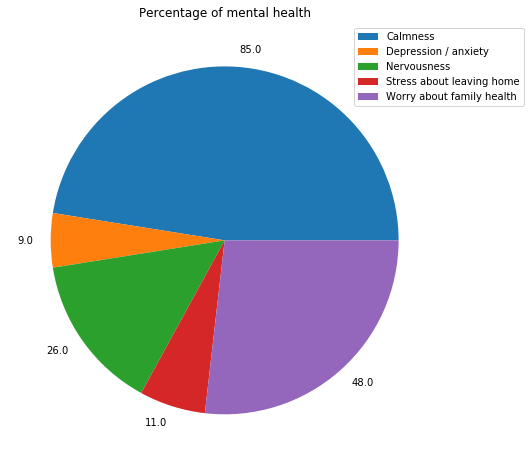

In [64]:
# Plot to see the visualisation of proportion of mental health

fig, ax = plt.subplots(figsize =(8, 8))
plt.pie(men_group_data['percentage'], labels = men_group_data['percentage'])
ax.set(title= 'Percentage of mental health')
plt.legend(men_group_data['indicator_name'], loc ="upper right", 
           bbox_to_anchor =(0.7, 0, 0.5, 1));

# Economic data

Covid-19 badly effected on world's economy as well. Let us see how it effects on weekly and monthly earnings in New Zealand.
We need to filter the data to have the rows of employment in the category column. 

In [5]:
# filtering to have rows of employment in the category column
data_emp = data[data['category']== 'Employment']
data_emp

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
0,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-05,997.14,$,11-02-21
1,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-12,1000.00,$,11-02-21
2,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-19,1000.00,$,11-02-21
3,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-26,1000.00,$,11-02-21
4,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-06-02,995.19,$,11-02-21
...,...,...,...,...,...,...,...,...,...
164379,Economic,Employment,Monthly filled jobs (by age),Marlborough,65 +,2020-08-01,1478.00,Number,29-01-21
164380,Economic,Employment,Monthly filled jobs (by age),Marlborough,65 +,2020-09-01,1510.00,Number,29-01-21
164381,Economic,Employment,Monthly filled jobs (by age),Marlborough,65 +,2020-10-01,1567.00,Number,29-01-21
164382,Economic,Employment,Monthly filled jobs (by age),Marlborough,65 +,2020-11-01,1538.00,Number,29-01-21


In [355]:
# To see are there nan values 
data_emp.isna().sum()

class                 0
category              0
indicator_name        0
series_name           0
sub_series_name       0
parameter             0
value                36
units                 0
date_last_updated     0
dtype: int64

value coulmn has 36 nan values

In [28]:
# To see the unique indicator in the indiator_name column
data_emp['indicator_name'].unique()

array(['Weekly median earnings (34 days)',
       'Jobs online measure by industry', 'Jobs online measure by region',
       'Jobs online measure', 'Weekly filled jobs (34 days)',
       'United States jobless claims', 'Monthly filled jobs',
       'Monthly earnings', 'Monthly filled jobs (by industry)',
       'Monthly filled jobs (by region)',
       'Monthly filled jobs (by gender)', 'Monthly filled jobs (by age)'],
      dtype=object)

As we are interested in the weekly and monthly earnings, we need to filter units column to have the rows of "$" which represents earnings

In [6]:
# Filtering to have the rows of $ in the units column
data_emp_earning =  data_emp[data_emp['units']=='$']
data_emp_earning

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
0,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-05,997.14,$,11-02-21
1,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-12,1000.00,$,11-02-21
2,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-19,1000.00,$,11-02-21
3,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-26,1000.00,$,11-02-21
4,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-06-02,995.19,$,11-02-21
...,...,...,...,...,...,...,...,...,...
159259,Economic,Employment,Monthly earnings,Service industries (trend),Service industries (trend),2020-08-01,NaN,$,29-01-21
159260,Economic,Employment,Monthly earnings,Service industries (trend),Service industries (trend),2020-09-01,NaN,$,29-01-21
159261,Economic,Employment,Monthly earnings,Service industries (trend),Service industries (trend),2020-10-01,NaN,$,29-01-21
159262,Economic,Employment,Monthly earnings,Service industries (trend),Service industries (trend),2020-11-01,NaN,$,29-01-21


In [7]:
# To see the types of indicator
data_emp_earning['indicator_name'].unique()

array(['Weekly median earnings (34 days)', 'Monthly earnings'],
      dtype=object)

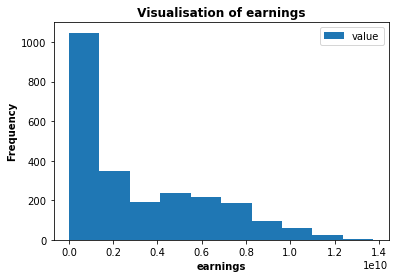

In [9]:
# To see the distribution of earnings
data_emp_earning.plot.hist()

plt.title(' Visualisation of earnings ', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.xlabel('earnings', weight='bold');

## Weekly earnings

There are two indicators, weekly earnings and monthly earnings. We would like to compute weekly and monthly earnings seperately.We have to filter the data seperately.

In [40]:
# Filtering to have the rows of weekly median earnings in the indicator_name column
data_emp_earn_week = data_emp_earning[data_emp_wages['indicator_name']=='Weekly median earnings (34 days)']
data_emp_earn_week

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
0,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-05,997.14,$,11-02-21
1,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-12,1000.00,$,11-02-21
2,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-19,1000.00,$,11-02-21
3,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-05-26,1000.00,$,11-02-21
4,Economic,Employment,Weekly median earnings (34 days),Total,Total,2019-06-02,995.19,$,11-02-21
...,...,...,...,...,...,...,...,...,...
347,Economic,Employment,Weekly median earnings (34 days),Services,Services,2020-12-06,1040.44,$,11-02-21
348,Economic,Employment,Weekly median earnings (34 days),Services,Services,2020-12-13,1055.00,$,11-02-21
349,Economic,Employment,Weekly median earnings (34 days),Services,Services,2020-12-20,1046.25,$,11-02-21
350,Economic,Employment,Weekly median earnings (34 days),Services,Services,2020-12-27,1066.80,$,11-02-21


In [41]:
# To see max value of weekly earnings
data_emp_earn_week.value.max()

1250.0

In [42]:
# To see is there any nan value 
data_emp_earn_week.isna().sum()

class                0
category             0
indicator_name       0
series_name          0
sub_series_name      0
parameter            0
value                0
units                0
date_last_updated    0
dtype: int64

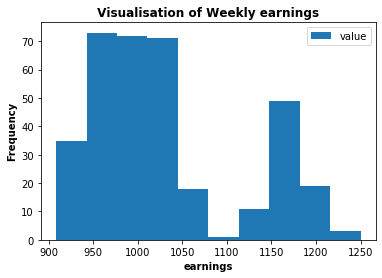

In [96]:
# Histogram to see the distribution of weekly earnings data 
data_emp_earn_week.plot.hist()

plt.title(' Visualisation of Weekly earnings ', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.xlabel('earnings', weight='bold');

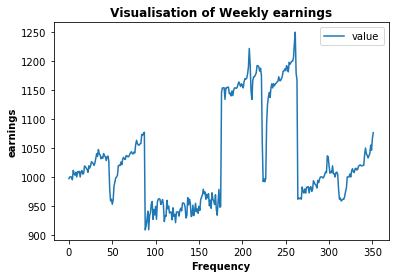

In [90]:
# Line plot to see the distribution of weekly earnings data 
data_emp_earn_week.plot()

plt.title(' Visualisation of Weekly earnings ', weight='bold')
plt.xlabel('Frequency', weight='bold')
plt.ylabel('earnings', weight='bold');

In [43]:
#Grouping series_name coulmn to have max, min and mean values 
data_emp_earn_group = data_emp_earn_week.groupby(['series_name']).agg({'value':['max', 'min', 'mean']})
data_emp_earn_group

value                     
                     max     min         mean
series_name                                  
Goods Producing  1250.00  991.56  1158.752841
Primary           978.75  908.50   947.228864
Services         1076.49  958.45  1000.647159
Total            1077.25  952.78  1023.285909

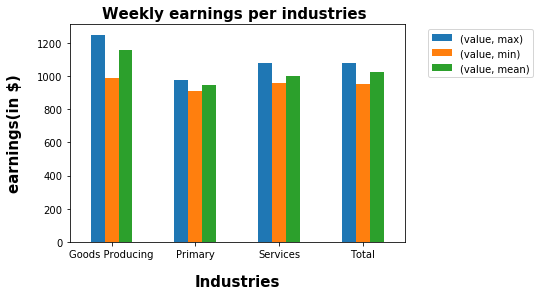

In [46]:
# Plot to see weekly earnings per industries

data_emp_earn_group.plot(kind='bar')
plt.title('Weekly earnings per industries ', size=15, weight='bold')
plt.xlabel('Industries', size=15, labelpad=15, weight='bold')
plt.ylabel('earnings(in $)', size=15, labelpad=15, weight='bold')
plt.legend( loc ="upper right",
           bbox_to_anchor =(0.9, 0, 0.5, 1));
plt.xticks(rotation=0);

## Monthly earnings

In [47]:
# Filtering to have the rows of monthly earnings in the indicator_name column
data_emp_earn_mon = data_emp_wages[data_emp_wages['indicator_name']=='Monthly earnings']
data_emp_earn_mon

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
157176,Economic,Employment,Monthly earnings,All industries (actual),All industries (actual),1999-04-01,3.473775e+09,$,29-01-21
157177,Economic,Employment,Monthly earnings,All industries (actual),All industries (actual),1999-05-01,3.538795e+09,$,29-01-21
157178,Economic,Employment,Monthly earnings,All industries (actual),All industries (actual),1999-06-01,3.770561e+09,$,29-01-21
157179,Economic,Employment,Monthly earnings,All industries (actual),All industries (actual),1999-07-01,3.605764e+09,$,29-01-21
157180,Economic,Employment,Monthly earnings,All industries (actual),All industries (actual),1999-08-01,3.640036e+09,$,29-01-21
...,...,...,...,...,...,...,...,...,...
159259,Economic,Employment,Monthly earnings,Service industries (trend),Service industries (trend),2020-08-01,NaN,$,29-01-21
159260,Economic,Employment,Monthly earnings,Service industries (trend),Service industries (trend),2020-09-01,NaN,$,29-01-21
159261,Economic,Employment,Monthly earnings,Service industries (trend),Service industries (trend),2020-10-01,NaN,$,29-01-21
159262,Economic,Employment,Monthly earnings,Service industries (trend),Service industries (trend),2020-11-01,NaN,$,29-01-21


In [48]:
# To check are there nan values
data_emp_earn_mon.isna().sum()

class                 0
category              0
indicator_name        0
series_name           0
sub_series_name       0
parameter             0
value                36
units                 0
date_last_updated     0
dtype: int64

In [50]:
# Filling nan values of the value column with mean of the value column
data_emp_earn_mon.value.fillna(data_emp_earn_mon.value.mean(), inplace=True)

C:\Users\faree\Desktop\sample_project\env\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [51]:
# To cross check is there any nan value left
data_emp_earn_mon.isna().sum()

class                0
category             0
indicator_name       0
series_name          0
sub_series_name      0
parameter            0
value                0
units                0
date_last_updated    0
dtype: int64

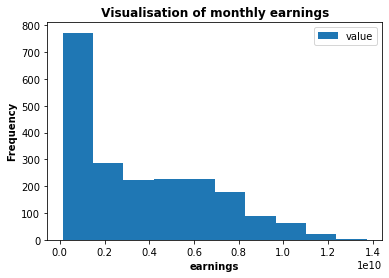

In [97]:
# Histogram to see the distribution of monthly earnings data 
data_emp_earn_mon.plot.hist()

plt.title(' Visualisation of monthly earnings ', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.xlabel('earnings', weight='bold');

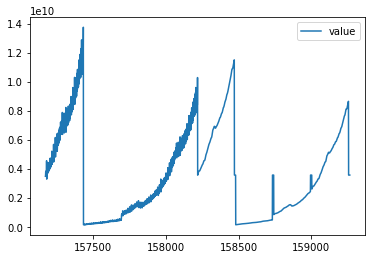

In [92]:
# Line plot to see the distribution of weekly earnings data 
data_emp_earn_mon.plot()

In [53]:
# Grouping sereis name to have max, min and mean earnings for each industry
dat_emp_group = data_emp_earn_mon.groupby('series_name').agg({'value':['max', 'min', 'mean']})
data_emp_group

value                            
                                              max           min          mean
series_name                                                                  
All industries (actual)              1.374454e+10  3.278557e+09  7.196331e+09
All industries (trend)               1.149549e+10  3.550777e+09  6.906716e+09
Goods-producing industries (actual)  2.883511e+09  7.448127e+08  1.551620e+09
Goods-producing industries (trend)   3.556441e+09  8.325339e+08  1.588811e+09
Primary industries (actual)          5.848592e+08  1.210186e+08  2.956047e+08
Primary industries (trend)           3.556441e+09  1.319298e+08  4.017677e+08
Service industries (actual)          1.027617e+10  2.394599e+09  5.349105e+09
Service industries (trend)           8.639133e+09  2.593376e+09  5.161575e+09

In [54]:
# Dropping all industries rows for the better visaualisation
data_emp_group_drop = data_emp_group.drop(['All industries (actual)', 'All industries (trend)'])
data_emp_group_drop

value                            
                                              max           min          mean
series_name                                                                  
Goods-producing industries (actual)  2.883511e+09  7.448127e+08  1.551620e+09
Goods-producing industries (trend)   3.556441e+09  8.325339e+08  1.588811e+09
Primary industries (actual)          5.848592e+08  1.210186e+08  2.956047e+08
Primary industries (trend)           3.556441e+09  1.319298e+08  4.017677e+08
Service industries (actual)          1.027617e+10  2.394599e+09  5.349105e+09
Service industries (trend)           8.639133e+09  2.593376e+09  5.161575e+09

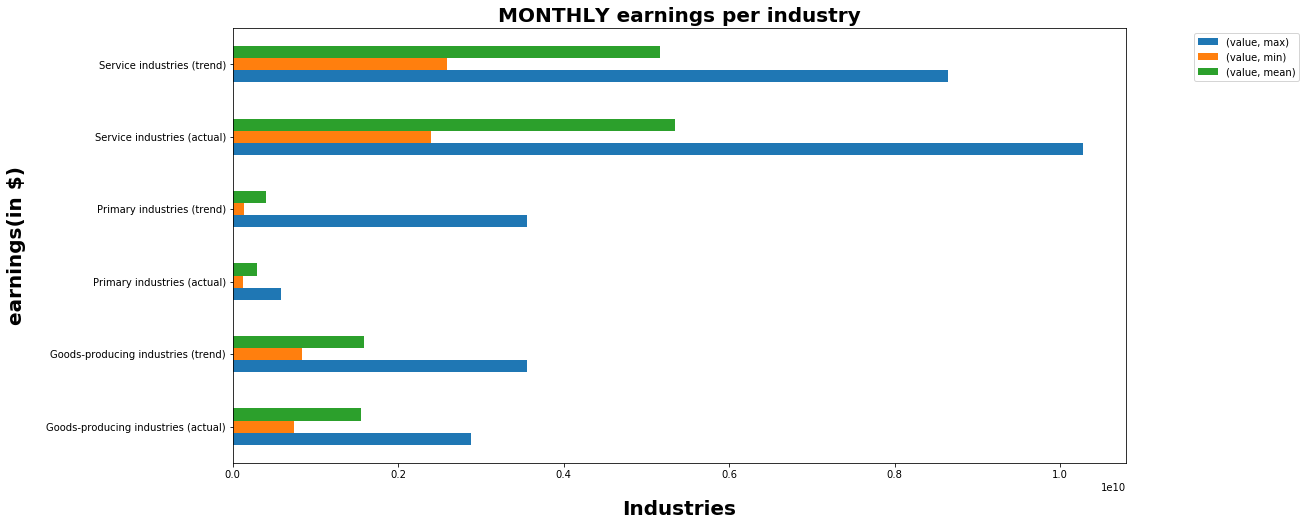

In [62]:
# Plot to see monthly earnings per industry

data_emp_group_drop.plot(kind='barh', figsize=(16, 8))
plt.title('MONTHLY earnings per industry', size=20, weight='bold')
plt.xlabel('Industries', size=20, labelpad=20, weight='bold')
plt.ylabel('earnings(in $)', size=20, labelpad=20, weight='bold')
plt.legend( loc ="upper right",
           bbox_to_anchor =(0.7, 0, 0.5, 1));
plt.xticks(rotation=0);